In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [25]:
# Load dataset
file_path = "malaria_drug_resistance_data.csv"  # Update with actual path in Colab
df = pd.read_csv(file_path)

In [26]:
# Display basic information about the dataset
df_info = df.info()
df_head = df.head()
df_missing = df.isnull().sum()

df_info, df_head, df_missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sample_ID        1000 non-null   object 
 1   SNP_1            1000 non-null   object 
 2   SNP_2            1000 non-null   object 
 3   Gene_Exp_1       1000 non-null   float64
 4   Gene_Exp_2       1000 non-null   float64
 5   Protein_1        1000 non-null   float64
 6   Protein_2        1000 non-null   float64
 7   Drug_Type        1000 non-null   object 
 8   Drug_Resistance  1000 non-null   int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


(None,
   Sample_ID SNP_1 SNP_2  Gene_Exp_1  Gene_Exp_2  Protein_1  Protein_2  \
 0     S0001   G/T   C/C    2.258763    2.986204   1.378136   1.186792   
 1     S0002   A/C   G/T    5.648059    2.846299   1.613695   1.630321   
 2     S0003   T/T   A/T    8.792985    9.109419   0.575889   1.544306   
 3     S0004   G/T   A/T    7.456136    2.870689   1.287261   0.392410   
 4     S0005   G/G   A/T    8.162331    3.083522   1.186317   0.383574   
 
     Drug_Type  Drug_Resistance  
 0     Quinine                1  
 1     Quinine                1  
 2  Mefloquine                1  
 3     Quinine                1  
 4  Primaquine                0  ,
 Sample_ID          0
 SNP_1              0
 SNP_2              0
 Gene_Exp_1         0
 Gene_Exp_2         0
 Protein_1          0
 Protein_2          0
 Drug_Type          0
 Drug_Resistance    0
 dtype: int64)

In [27]:
df.head(6)

,Sample_ID,SNP_1,SNP_2,Gene_Exp_1,Gene_Exp_2,Protein_1,Protein_2,Drug_Type,Drug_Resistance
0,S0001,G/T,C/C,2.258763,2.986204,1.378136,1.186792,Quinine,1
1,S0002,A/C,G/T,5.648059,2.846299,1.613695,1.630321,Quinine,1
2,S0003,T/T,A/T,8.792985,9.109419,0.575889,1.544306,Mefloquine,1
3,S0004,G/T,A/T,7.456136,2.870689,1.287261,0.392410,Quinine,1
4,S0005,G/G,A/T,8.162331,3.083522,1.186317,0.383574,Primaquine,0
5,S0006,A/A,T/T,6.758442,7.714283,1.682378,0.609531,Quinine,0


In [28]:
# Store unique values before encoding
snp1_categories = df["SNP_1"].unique()
snp2_categories = df["SNP_2"].unique()
drug_type_categories = df["Drug_Type"].unique()

# Encode categorical features
encoder_snp1 = LabelEncoder()
encoder_snp2 = LabelEncoder()
encoder_drug = LabelEncoder()

df["SNP_1"] = encoder_snp1.fit_transform(df["SNP_1"])
df["SNP_2"] = encoder_snp2.fit_transform(df["SNP_2"])
df["Drug_Type"] = encoder_drug.fit_transform(df["Drug_Type"])


In [29]:
# Encode categorical features (SNP_1, SNP_2, Drug_Type)
encoder = LabelEncoder()
df["SNP_1"] = encoder.fit_transform(df["SNP_1"])
df["SNP_2"] = encoder.fit_transform(df["SNP_2"])
df["Drug_Type"] = encoder.fit_transform(df["Drug_Type"])

In [30]:
# Select features and target
X = df.drop(columns=["Sample_ID", "Drug_Resistance"])  # Features
y = df["Drug_Resistance"]  # Target

In [31]:
# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
# Split dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [33]:
# Check the shape of the training set
X_train.shape, X_test.shape

((800, 7), (200, 7))

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [35]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
# Predictions on test data
y_pred = model.predict(X_test)

In [37]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [38]:
accuracy, classification_rep

(0.535,
 '              precision    recall  f1-score   support\n\n           0       0.53      0.47      0.50        98\n           1       0.54      0.60      0.57       102\n\n    accuracy                           0.54       200\n   macro avg       0.53      0.53      0.53       200\nweighted avg       0.53      0.54      0.53       200\n')

In [39]:
# Create a new sample data point (simulated)
new_sample = np.array([[1, 2, 0, 3.5, 4.2, 1.1, 0.9]])  # Encoded and scaled manually

In [40]:
# Predict using the trained model
new_prediction = model.predict(new_sample)[0]

new_prediction

1

In [41]:
import pickle

# Save the trained model to a file
model_filename = "malaria_drug_resistance_model.pkl"
with open(model_filename, "wb") as model_file:
    pickle.dump(model, model_file)

model_filename


'malaria_drug_resistance_model.pkl'

In [42]:
# Load the trained model
with open("malaria_drug_resistance_model.pkl", "rb") as model_file:
    model = pickle.load(model_file)

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importance scores
feature_importances = model.feature_importances_

# Define feature names (excluding Sample_ID and Drug_Resistance)
feature_names = ["SNP_1", "SNP_2", "Drug_Type", "Gene_Exp_1", "Gene_Exp_2", "Protein_1", "Protein_2"]

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})

# Sort features by importance
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Display feature importance
print(importance_df)

      Feature  Importance
3  Gene_Exp_1    0.193802
2   Drug_Type    0.192597
5   Protein_1    0.182922
4  Gene_Exp_2    0.181073
0       SNP_1    0.090700
1       SNP_2    0.088949
6   Protein_2    0.069955


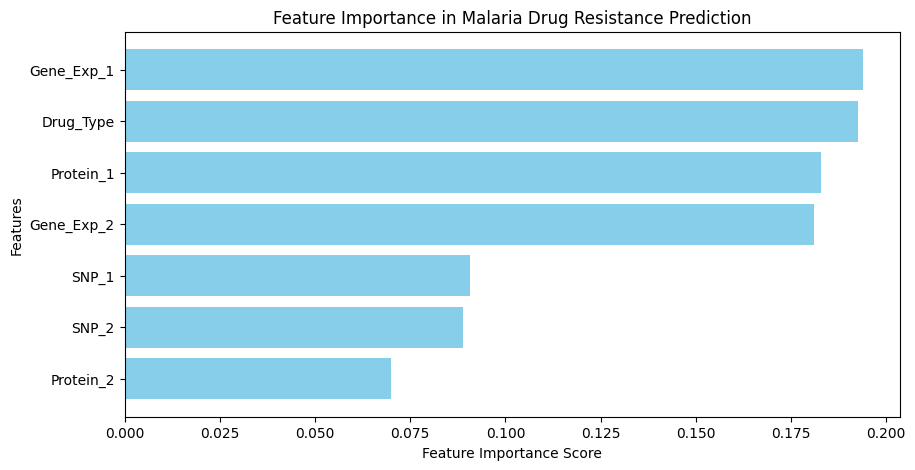

In [44]:
# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Malaria Drug Resistance Prediction")
plt.gca().invert_yaxis()  # Flip to show highest importance on top
plt.show()